# Importing libraries

In [428]:
import bamboolib as bam 
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from datetime import datetime
from dateutil.relativedelta import relativedelta
from sklearn.preprocessing import LabelEncoder
from datetime import datetime

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import GridSearchCV

import statsmodels.api as sm
from sklearn import svm
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score,recall_score,precision_score, confusion_matrix, mean_squared_error

import warnings
warnings.filterwarnings('ignore')

# Loading excel file

In [317]:
df=pd.read_csv("/Users/abhi/Documents/NU/AAA_Courses/ALY6020 Predictive Analytics/W5/Assignment/bike_crash.csv")
df.head()

,$1000 Damage to Any One Person's Property,Active School Zone Flag,At Intersection Flag,Average Daily Traffic Amount,Construction Zone Flag,Crash Severity,Crash Time,Crash Total Injury Count,Crash Year,Day of Week,Highway System,Intersection Related,Light Condition,Road Class,Roadway Part,Speed Limit,Surface Condition,Traffic Control Type,Weather Condition,Person Helmet
0,No,No,False,15262,No,Incapacitating Injury,239,1,2010,Friday,Farm To Market,Non Intersection,"Dark, Lighted",Farm To Market,Main/Proper Lane,45,Dry,Marked Lanes,Clear,"Worn, Damaged"
1,No,No,False,No Data,No,Non-Incapacitating Injury,310,2,2010,Friday,No Data,Non Intersection,"Dark, Lighted",City Street,Main/Proper Lane,35,Dry,Center Stripe/Divider,Clear,Not Worn
2,No,No,False,No Data,No,Non-Incapacitating Injury,310,2,2010,Friday,No Data,Non Intersection,"Dark, Lighted",City Street,Main/Proper Lane,35,Dry,Center Stripe/Divider,Clear,Not Worn
3,No,No,False,No Data,No,Non-Incapacitating Injury,310,2,2010,Friday,No Data,Non Intersection,"Dark, Lighted",City Street,Main/Proper Lane,35,Dry,Center Stripe/Divider,Clear,Not Worn
4,No,No,False,22775,No,Non-Incapacitating Injury,2300,1,2010,Monday,State Loop,Intersection Related,"Dark, Not Lighted",US & State Highways,Main/Proper Lane,45,Dry,None,Clear,Not Worn


# Data Cleaning

In [318]:
df.shape

(2463, 20)

In [319]:
# Checking the Data types
df.dtypes

$1000 Damage to Any One Person's Property    object
Active School Zone Flag                      object
At Intersection Flag                           bool
Average Daily Traffic Amount                 object
Construction Zone Flag                       object
Crash Severity                               object
Crash Time                                    int64
Crash Total Injury Count                      int64
Crash Year                                    int64
Day of Week                                  object
Highway System                               object
Intersection Related                         object
Light Condition                              object
Road Class                                   object
Roadway Part                                 object
Speed Limit                                   int64
Surface Condition                            object
Traffic Control Type                         object
Weather Condition                            object
Person Helme

In [320]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2463 entries, 0 to 2462
Data columns (total 20 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   $1000 Damage to Any One Person's Property  2463 non-null   object
 1   Active School Zone Flag                    2463 non-null   object
 2   At Intersection Flag                       2463 non-null   bool  
 3   Average Daily Traffic Amount               2463 non-null   object
 4   Construction Zone Flag                     2463 non-null   object
 5   Crash Severity                             2463 non-null   object
 6   Crash Time                                 2463 non-null   int64 
 7   Crash Total Injury Count                   2463 non-null   int64 
 8   Crash Year                                 2463 non-null   int64 
 9   Day of Week                                2463 non-null   object
 10  Highway System                      

In [321]:
# Summary of dataset
df.describe()

,Crash Time,Crash Total Injury Count,Crash Year,Speed Limit
count,2463.000000,2463.000000,2463.000000,2463.000000
mean,1404.700771,1.092164,2013.403979,26.410881
std,558.967560,1.208230,2.248480,17.005282
min,1.000000,0.000000,2010.000000,-1.000000
25%,1008.000000,1.000000,2011.000000,0.000000
50%,1532.000000,1.000000,2013.000000,30.000000
75%,1822.500000,1.000000,2015.000000,35.000000
max,2358.000000,15.000000,2017.000000,65.000000


In [322]:
# Checking for missing values 
# percentage of missing values per column
(df.isna().sum() / len(df)) * 100

$1000 Damage to Any One Person's Property    0.0
Active School Zone Flag                      0.0
At Intersection Flag                         0.0
Average Daily Traffic Amount                 0.0
Construction Zone Flag                       0.0
Crash Severity                               0.0
Crash Time                                   0.0
Crash Total Injury Count                     0.0
Crash Year                                   0.0
Day of Week                                  0.0
Highway System                               0.0
Intersection Related                         0.0
Light Condition                              0.0
Road Class                                   0.0
Roadway Part                                 0.0
Speed Limit                                  0.0
Surface Condition                            0.0
Traffic Control Type                         0.0
Weather Condition                            0.0
Person Helmet                                0.0
dtype: float64

## Feature Engineering 

In [323]:
## Average Daily Traffic Amount - 85% of data is "No Data" hence this column can be eliminated. 
df = df.drop(columns=['Average Daily Traffic Amount'])


In [324]:
df.head()

,$1000 Damage to Any One Person's Property,Active School Zone Flag,At Intersection Flag,Construction Zone Flag,Crash Severity,Crash Time,Crash Total Injury Count,Crash Year,Day of Week,Highway System,Intersection Related,Light Condition,Road Class,Roadway Part,Speed Limit,Surface Condition,Traffic Control Type,Weather Condition,Person Helmet
0,No,No,False,No,Incapacitating Injury,239,1,2010,Friday,Farm To Market,Non Intersection,"Dark, Lighted",Farm To Market,Main/Proper Lane,45,Dry,Marked Lanes,Clear,"Worn, Damaged"
1,No,No,False,No,Non-Incapacitating Injury,310,2,2010,Friday,No Data,Non Intersection,"Dark, Lighted",City Street,Main/Proper Lane,35,Dry,Center Stripe/Divider,Clear,Not Worn
2,No,No,False,No,Non-Incapacitating Injury,310,2,2010,Friday,No Data,Non Intersection,"Dark, Lighted",City Street,Main/Proper Lane,35,Dry,Center Stripe/Divider,Clear,Not Worn
3,No,No,False,No,Non-Incapacitating Injury,310,2,2010,Friday,No Data,Non Intersection,"Dark, Lighted",City Street,Main/Proper Lane,35,Dry,Center Stripe/Divider,Clear,Not Worn
4,No,No,False,No,Non-Incapacitating Injury,2300,1,2010,Monday,State Loop,Intersection Related,"Dark, Not Lighted",US & State Highways,Main/Proper Lane,45,Dry,None,Clear,Not Worn


In [325]:
## Speed Limit has invalid values of -1 and 0 which needs to be rectified. 
df['Speed Limit'].unique()

array([45, 35,  0, 30, 40, 50, 55, 60, 25, 15, 65, 20, 10,  5, 36, -1, 32])

In [326]:
# Speed Limit 
# filetring rows with Speed Limit > 0 
speedLimitFilter = df.loc[df['Speed Limit'] > 0]
# Calculating mean of the speed limit
speedLimitFilter["Speed Limit"].mean()

35.520369364475826

In [327]:
#The mean value of speed limit without 0 and -1 values is 35.52. Checking the normal values of Speed Limit, 
#I have decide to round down to 35 to fill the existing values of 0 and -1 with. 
df.loc[df['Speed Limit'] < 1, 'Speed Limit'] = 35
df.head()

,$1000 Damage to Any One Person's Property,Active School Zone Flag,At Intersection Flag,Construction Zone Flag,Crash Severity,Crash Time,Crash Total Injury Count,Crash Year,Day of Week,Highway System,Intersection Related,Light Condition,Road Class,Roadway Part,Speed Limit,Surface Condition,Traffic Control Type,Weather Condition,Person Helmet
0,No,No,False,No,Incapacitating Injury,239,1,2010,Friday,Farm To Market,Non Intersection,"Dark, Lighted",Farm To Market,Main/Proper Lane,45,Dry,Marked Lanes,Clear,"Worn, Damaged"
1,No,No,False,No,Non-Incapacitating Injury,310,2,2010,Friday,No Data,Non Intersection,"Dark, Lighted",City Street,Main/Proper Lane,35,Dry,Center Stripe/Divider,Clear,Not Worn
2,No,No,False,No,Non-Incapacitating Injury,310,2,2010,Friday,No Data,Non Intersection,"Dark, Lighted",City Street,Main/Proper Lane,35,Dry,Center Stripe/Divider,Clear,Not Worn
3,No,No,False,No,Non-Incapacitating Injury,310,2,2010,Friday,No Data,Non Intersection,"Dark, Lighted",City Street,Main/Proper Lane,35,Dry,Center Stripe/Divider,Clear,Not Worn
4,No,No,False,No,Non-Incapacitating Injury,2300,1,2010,Monday,State Loop,Intersection Related,"Dark, Not Lighted",US & State Highways,Main/Proper Lane,45,Dry,None,Clear,Not Worn


In [328]:
## Severity 
df['Crash Severity'].unique()

array(['Incapacitating Injury', 'Non-Incapacitating Injury',
       'Possible Injury', 'Not Injured', 'Killed'], dtype=object)

In [329]:
# defining crash severity
# 10% of data is incapacitating injury which is any injury, other than a fatal injury, which prevents the injured person from walking, driving or normally continuing the activities the person was capable of performing before the injury occurred.
# around 6% of data is killed. Both of which pose high severity, hence grouped together as 3 indicating high severity 
# Possible injury accounts for 22% of the data, which poses medium severity. This is indicated as 2 severity
# 6% of data is non incapacitating  and 7% of data is not injured, both of which posse less severity, hence grouped as 1
def categorise(row):  
    if row['Crash Severity'] in 'Incapacitating Injury':
        return 2
    elif row['Crash Severity'] in 'Killed':
        return 2
    elif row['Crash Severity'] in 'Possible Injury':
        return 1
    return 0

df['severity'] = df.apply(lambda row: categorise(row), axis=1)
del df["Crash Severity"]
df.tail(10)

,$1000 Damage to Any One Person's Property,Active School Zone Flag,At Intersection Flag,Construction Zone Flag,Crash Time,Crash Total Injury Count,Crash Year,Day of Week,Highway System,Intersection Related,Light Condition,Road Class,Roadway Part,Speed Limit,Surface Condition,Traffic Control Type,Weather Condition,Person Helmet,severity
2453,Yes,No,True,No,748,1,2017,Thursday,No Data,Intersection Related,Daylight,City Street,Main/Proper Lane,35,Dry,Signal Light,Clear,Not Worn,2
2454,Yes,No,True,No,1732,1,2017,Thursday,No Data,Intersection Related,Dusk,City Street,Main/Proper Lane,35,Dry,None,Clear,"Worn, Not Damaged",1
2455,No,No,True,No,1904,1,2017,Friday,State Loop,Intersection Related,"Dark, Not Lighted",US & State Highways,Main/Proper Lane,35,Dry,None,Clear,Not Worn,1
2456,No,No,True,No,1930,1,2017,Saturday,No Data,Intersection Related,"Dark, Lighted",City Street,Main/Proper Lane,45,Dry,Signal Light,Clear,Not Worn,2
2457,No,No,False,No,1530,1,2017,Monday,No Data,Non Intersection,Daylight,City Street,Main/Proper Lane,15,Dry,Marked Lanes,Clear,Not Worn,0
2458,No,No,True,No,1254,1,2017,Tuesday,No Data,Intersection Related,Daylight,City Street,Main/Proper Lane,40,Dry,Signal Light,Cloudy,Not Worn,0
2459,No,No,True,No,2048,1,2017,Tuesday,No Data,Non Intersection,"Dark, Lighted",City Street,Main/Proper Lane,35,Dry,Center Stripe/Divider,Clear,Not Worn,0
2460,No,No,True,No,737,0,2017,Thursday,No Data,Intersection Related,Daylight,City Street,Main/Proper Lane,30,Wet,Signal Light,Rain,Not Worn,0
2461,Yes,No,True,No,930,1,2017,Friday,No Data,Intersection,Daylight,City Street,Main/Proper Lane,35,Dry,Stop Sign,Clear,"Worn, Unk Damage",0
2462,Yes,No,True,No,1802,0,2017,Friday,No Data,Intersection,"Dark, Lighted",City Street,Main/Proper Lane,35,Dry,Marked Lanes,Clear,Not Worn,0


In [330]:
df['$1000 Damage to Any One Person\'s Property'].unique()

array(['No', 'Yes'], dtype=object)

In [331]:
tmp_condition = df['$1000 Damage to Any One Person\'s Property'].isin(['Yes'])
df.loc[tmp_condition, '$1000 Damage to Any One Person\'s Property'] = 1
df.loc[~tmp_condition, '$1000 Damage to Any One Person\'s Property'] = 0
df.head()

,$1000 Damage to Any One Person's Property,Active School Zone Flag,At Intersection Flag,Construction Zone Flag,Crash Time,Crash Total Injury Count,Crash Year,Day of Week,Highway System,Intersection Related,Light Condition,Road Class,Roadway Part,Speed Limit,Surface Condition,Traffic Control Type,Weather Condition,Person Helmet,severity
0,0,No,False,No,239,1,2010,Friday,Farm To Market,Non Intersection,"Dark, Lighted",Farm To Market,Main/Proper Lane,45,Dry,Marked Lanes,Clear,"Worn, Damaged",2
1,0,No,False,No,310,2,2010,Friday,No Data,Non Intersection,"Dark, Lighted",City Street,Main/Proper Lane,35,Dry,Center Stripe/Divider,Clear,Not Worn,0
2,0,No,False,No,310,2,2010,Friday,No Data,Non Intersection,"Dark, Lighted",City Street,Main/Proper Lane,35,Dry,Center Stripe/Divider,Clear,Not Worn,0
3,0,No,False,No,310,2,2010,Friday,No Data,Non Intersection,"Dark, Lighted",City Street,Main/Proper Lane,35,Dry,Center Stripe/Divider,Clear,Not Worn,0
4,0,No,False,No,2300,1,2010,Monday,State Loop,Intersection Related,"Dark, Not Lighted",US & State Highways,Main/Proper Lane,45,Dry,None,Clear,Not Worn,0


In [332]:
df['Active School Zone Flag'].unique()

array(['No', 'Yes'], dtype=object)

In [333]:
tmp_condition = df['Active School Zone Flag'].isin(['Yes'])
df.loc[tmp_condition, 'Active School Zone Flag'] = 1
df.loc[~tmp_condition, 'Active School Zone Flag'] = 0
df.head()

,$1000 Damage to Any One Person's Property,Active School Zone Flag,At Intersection Flag,Construction Zone Flag,Crash Time,Crash Total Injury Count,Crash Year,Day of Week,Highway System,Intersection Related,Light Condition,Road Class,Roadway Part,Speed Limit,Surface Condition,Traffic Control Type,Weather Condition,Person Helmet,severity
0,0,0,False,No,239,1,2010,Friday,Farm To Market,Non Intersection,"Dark, Lighted",Farm To Market,Main/Proper Lane,45,Dry,Marked Lanes,Clear,"Worn, Damaged",2
1,0,0,False,No,310,2,2010,Friday,No Data,Non Intersection,"Dark, Lighted",City Street,Main/Proper Lane,35,Dry,Center Stripe/Divider,Clear,Not Worn,0
2,0,0,False,No,310,2,2010,Friday,No Data,Non Intersection,"Dark, Lighted",City Street,Main/Proper Lane,35,Dry,Center Stripe/Divider,Clear,Not Worn,0
3,0,0,False,No,310,2,2010,Friday,No Data,Non Intersection,"Dark, Lighted",City Street,Main/Proper Lane,35,Dry,Center Stripe/Divider,Clear,Not Worn,0
4,0,0,False,No,2300,1,2010,Monday,State Loop,Intersection Related,"Dark, Not Lighted",US & State Highways,Main/Proper Lane,45,Dry,None,Clear,Not Worn,0


In [334]:
df['Construction Zone Flag'].unique()

array(['No', 'Yes'], dtype=object)

In [335]:
tmp_condition = df['Construction Zone Flag'].isin(['Yes'])
df.loc[tmp_condition, 'Construction Zone Flag'] = 1
df.loc[~tmp_condition, 'Construction Zone Flag'] = 0
df.head()

,$1000 Damage to Any One Person's Property,Active School Zone Flag,At Intersection Flag,Construction Zone Flag,Crash Time,Crash Total Injury Count,Crash Year,Day of Week,Highway System,Intersection Related,Light Condition,Road Class,Roadway Part,Speed Limit,Surface Condition,Traffic Control Type,Weather Condition,Person Helmet,severity
0,0,0,False,0,239,1,2010,Friday,Farm To Market,Non Intersection,"Dark, Lighted",Farm To Market,Main/Proper Lane,45,Dry,Marked Lanes,Clear,"Worn, Damaged",2
1,0,0,False,0,310,2,2010,Friday,No Data,Non Intersection,"Dark, Lighted",City Street,Main/Proper Lane,35,Dry,Center Stripe/Divider,Clear,Not Worn,0
2,0,0,False,0,310,2,2010,Friday,No Data,Non Intersection,"Dark, Lighted",City Street,Main/Proper Lane,35,Dry,Center Stripe/Divider,Clear,Not Worn,0
3,0,0,False,0,310,2,2010,Friday,No Data,Non Intersection,"Dark, Lighted",City Street,Main/Proper Lane,35,Dry,Center Stripe/Divider,Clear,Not Worn,0
4,0,0,False,0,2300,1,2010,Monday,State Loop,Intersection Related,"Dark, Not Lighted",US & State Highways,Main/Proper Lane,45,Dry,None,Clear,Not Worn,0


In [336]:
df['Crash Year'].unique()

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017])

In [337]:
df['Day of Week'].unique()

array(['Friday', 'Monday', 'Wednesday', 'Thursday', 'Tuesday', 'Saturday',
       'Sunday'], dtype=object)

In [338]:
df['Highway System'].unique()

array(['Farm To Market', 'No Data', 'State Loop', 'Interstate',
       'State Highway', 'US Highway', 'Ranch To Mkt', 'State Spur'],
      dtype=object)

In [339]:
fig = px.histogram(df, x='Highway System')
fig

In [340]:
# More than 80% of the Highway System data has value of "No Data". hence dropping this column as it would not provide any analytical advantage. 
df = df.drop(columns=['Highway System'])

In [341]:
df['Intersection Related'].unique()

array(['Non Intersection', 'Intersection Related', 'Driveway Access',
       'Intersection', 'Not Reported'], dtype=object)

In [342]:
fig = px.histogram(df, x='Intersection Related')
fig

In [343]:
tmp_condition = df['Intersection Related'].isin(['Intersection Related', 'Intersection'])
df.loc[tmp_condition, 'Intersection Related'] = 1
df.loc[~tmp_condition, 'Intersection Related'] = 0
df.head()

,$1000 Damage to Any One Person's Property,Active School Zone Flag,At Intersection Flag,Construction Zone Flag,Crash Time,Crash Total Injury Count,Crash Year,Day of Week,Intersection Related,Light Condition,Road Class,Roadway Part,Speed Limit,Surface Condition,Traffic Control Type,Weather Condition,Person Helmet,severity
0,0,0,False,0,239,1,2010,Friday,0,"Dark, Lighted",Farm To Market,Main/Proper Lane,45,Dry,Marked Lanes,Clear,"Worn, Damaged",2
1,0,0,False,0,310,2,2010,Friday,0,"Dark, Lighted",City Street,Main/Proper Lane,35,Dry,Center Stripe/Divider,Clear,Not Worn,0
2,0,0,False,0,310,2,2010,Friday,0,"Dark, Lighted",City Street,Main/Proper Lane,35,Dry,Center Stripe/Divider,Clear,Not Worn,0
3,0,0,False,0,310,2,2010,Friday,0,"Dark, Lighted",City Street,Main/Proper Lane,35,Dry,Center Stripe/Divider,Clear,Not Worn,0
4,0,0,False,0,2300,1,2010,Monday,1,"Dark, Not Lighted",US & State Highways,Main/Proper Lane,45,Dry,None,Clear,Not Worn,0


In [344]:
# Deleting At Intersection Flag as Intersection Related column provides more data as compared. 
df = df.drop(columns=['At Intersection Flag'])

In [345]:
df['Light Condition'].unique()

array(['Dark, Lighted', 'Dark, Not Lighted', 'Daylight', 'Dusk',
       'Unknown', 'Dark, Unknown Lighting', 'Dawn'], dtype=object)

In [346]:
fig = px.histogram(df, x='Light Condition')
fig

In [347]:
#Almost 70% of data in Light Condition column has value of 'Daylight'. 
tmp_condition = df['Light Condition'].isin(['Daylight'])
df.loc[tmp_condition, 'Light Condition'] = 1
df.loc[~tmp_condition, 'Light Condition'] = 0
df.head()

,$1000 Damage to Any One Person's Property,Active School Zone Flag,Construction Zone Flag,Crash Time,Crash Total Injury Count,Crash Year,Day of Week,Intersection Related,Light Condition,Road Class,Roadway Part,Speed Limit,Surface Condition,Traffic Control Type,Weather Condition,Person Helmet,severity
0,0,0,0,239,1,2010,Friday,0,0,Farm To Market,Main/Proper Lane,45,Dry,Marked Lanes,Clear,"Worn, Damaged",2
1,0,0,0,310,2,2010,Friday,0,0,City Street,Main/Proper Lane,35,Dry,Center Stripe/Divider,Clear,Not Worn,0
2,0,0,0,310,2,2010,Friday,0,0,City Street,Main/Proper Lane,35,Dry,Center Stripe/Divider,Clear,Not Worn,0
3,0,0,0,310,2,2010,Friday,0,0,City Street,Main/Proper Lane,35,Dry,Center Stripe/Divider,Clear,Not Worn,0
4,0,0,0,2300,1,2010,Monday,1,0,US & State Highways,Main/Proper Lane,45,Dry,None,Clear,Not Worn,0


In [348]:
df['Road Class'].unique()

array(['Farm To Market', 'City Street', 'US & State Highways',
       'Interstate', 'Non Trafficway', 'County Road', 'Other Roads'],
      dtype=object)

In [349]:
fig = px.histogram(df, x='Road Class')
fig

In [350]:
# More than 70% of the data shows bike crashes happened in city street. 

tmp_condition = df['Road Class'].isin(['City Street'])
df.loc[tmp_condition, 'Road Class'] = 1
df.loc[~tmp_condition, 'Road Class'] = 0
df.head()

,$1000 Damage to Any One Person's Property,Active School Zone Flag,Construction Zone Flag,Crash Time,Crash Total Injury Count,Crash Year,Day of Week,Intersection Related,Light Condition,Road Class,Roadway Part,Speed Limit,Surface Condition,Traffic Control Type,Weather Condition,Person Helmet,severity
0,0,0,0,239,1,2010,Friday,0,0,0,Main/Proper Lane,45,Dry,Marked Lanes,Clear,"Worn, Damaged",2
1,0,0,0,310,2,2010,Friday,0,0,1,Main/Proper Lane,35,Dry,Center Stripe/Divider,Clear,Not Worn,0
2,0,0,0,310,2,2010,Friday,0,0,1,Main/Proper Lane,35,Dry,Center Stripe/Divider,Clear,Not Worn,0
3,0,0,0,310,2,2010,Friday,0,0,1,Main/Proper Lane,35,Dry,Center Stripe/Divider,Clear,Not Worn,0
4,0,0,0,2300,1,2010,Monday,1,0,0,Main/Proper Lane,45,Dry,None,Clear,Not Worn,0


In [351]:
df['Roadway Part'].unique()

array(['Main/Proper Lane', 'Service/Frontage Road',
       'Other (Explain In Narrative)', 'Entrance/On Ramp'], dtype=object)

In [352]:
fig = px.histogram(df, x='Roadway Part')
fig

In [353]:
# 87% of the roadway part for the bike crashes happened in main/proper lane. Hence deleting this attribute 

df = df.drop(columns=['Roadway Part'])

In [354]:
df['Surface Condition'].unique()

array(['Dry', 'Wet', 'Unknown', 'Other (Explain In Narrative)', 'Ice',
       'Sand, Mud, Dirt', 'Standing Water'], dtype=object)

In [355]:
fig = px.histogram(df, x='Surface Condition')
fig

In [356]:
# More than 90% of the bike crashes happened in dry surface condition and only 6% of them in wet conditions. As this could pose an imbalance in the dataset, I decided to eliminate this categorical attribute. 
df = df.drop(columns=['Surface Condition'])

In [357]:
fig = px.histogram(df, x='Traffic Control Type')
fig

In [358]:
df['Traffic Control Type'].unique()

array(['Marked Lanes', 'Center Stripe/Divider', 'None', 'Signal Light',
       'Stop Sign', 'Other (Explain In Narrative)', 'Officer',
       'Crosswalk', 'Yield Sign', 'Bike Lane',
       'Signal Light With Red Light Running Camera', 'Warning Sign',
       'Flagman', 'Flashing Red Light', 'Flashing Yellow Light',
       'No Passing Zone'], dtype=object)

#### 25% of the bike crashes happened at signal light. A close second did not happen at any traffic control. 
#### Interesting about 6% of the accidents happen in bike lane! however severity of these accidents are low. 
#### Severity is high in traffic control types of "Signal Light With Red Light Running Camera", "Officer" and "Flagman". 

In [359]:
# Due to highly divergent data of traffic control type, I decided to eliminate this attribute. 
df = df.drop(columns=['Traffic Control Type'])

In [360]:
df['Weather Condition'].unique()

array(['Clear', 'Rain', 'Cloudy', 'Unknown', 'Fog',
       'Other (Explain In Narrative)', 'Blowing Sand/Snow'], dtype=object)

In [361]:
fig = px.histogram(df, x='Weather Condition')
fig

In [362]:
# About 83% of the bike crashes happened in clear weather condition, due to which eliminating this attribute would be better.

df = df.drop(columns=['Weather Condition'])

In [363]:
df['Person Helmet'].unique()

array(['Worn, Damaged', 'Not Worn', 'Worn, Unk Damage', 'Unknown If Worn',
       'Worn, Not Damaged'], dtype=object)

In [364]:
fig = px.histogram(df, x='Person Helmet')
fig

In [365]:
# ABout 55% of the times the person helmet was not worn. Hence keeping the attribute but converting to boolean value to show 0 for not worn and 1 for other situations. 
tmp_condition = df['Person Helmet'].isin(['Not Worn'])
df.loc[tmp_condition, 'Person Helmet'] = 0
df.loc[~tmp_condition, 'Person Helmet'] = 1
df.head()

,$1000 Damage to Any One Person's Property,Active School Zone Flag,Construction Zone Flag,Crash Time,Crash Total Injury Count,Crash Year,Day of Week,Intersection Related,Light Condition,Road Class,Speed Limit,Person Helmet,severity
0,0,0,0,239,1,2010,Friday,0,0,0,45,1,2
1,0,0,0,310,2,2010,Friday,0,0,1,35,0,0
2,0,0,0,310,2,2010,Friday,0,0,1,35,0,0
3,0,0,0,310,2,2010,Friday,0,0,1,35,0,0
4,0,0,0,2300,1,2010,Monday,1,0,0,45,0,0


In [366]:
df = df.drop(columns=['Day of Week'])

In [367]:
df.head()

,$1000 Damage to Any One Person's Property,Active School Zone Flag,Construction Zone Flag,Crash Time,Crash Total Injury Count,Crash Year,Intersection Related,Light Condition,Road Class,Speed Limit,Person Helmet,severity
0,0,0,0,239,1,2010,0,0,0,45,1,2
1,0,0,0,310,2,2010,0,0,1,35,0,0
2,0,0,0,310,2,2010,0,0,1,35,0,0
3,0,0,0,310,2,2010,0,0,1,35,0,0
4,0,0,0,2300,1,2010,1,0,0,45,0,0


In [368]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2463 entries, 0 to 2462
Data columns (total 12 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   $1000 Damage to Any One Person's Property  2463 non-null   object
 1   Active School Zone Flag                    2463 non-null   object
 2   Construction Zone Flag                     2463 non-null   object
 3   Crash Time                                 2463 non-null   int64 
 4   Crash Total Injury Count                   2463 non-null   int64 
 5   Crash Year                                 2463 non-null   int64 
 6   Intersection Related                       2463 non-null   object
 7   Light Condition                            2463 non-null   object
 8   Road Class                                 2463 non-null   object
 9   Speed Limit                                2463 non-null   int64 
 10  Person Helmet                       

In [369]:
for column_name in ['Person Helmet', 'Road Class', 'Light Condition', 'Intersection Related', "$1000 Damage to Any One Person's Property", 'Active School Zone Flag', 'Construction Zone Flag']:
    df[column_name] = df[column_name].astype('int')
df

,$1000 Damage to Any One Person's Property,Active School Zone Flag,Construction Zone Flag,Crash Time,Crash Total Injury Count,Crash Year,Intersection Related,Light Condition,Road Class,Speed Limit,Person Helmet,severity
0,0,0,0,239,1,2010,0,0,0,45,1,2
1,0,0,0,310,2,2010,0,0,1,35,0,0
2,0,0,0,310,2,2010,0,0,1,35,0,0
3,0,0,0,310,2,2010,0,0,1,35,0,0
4,0,0,0,2300,1,2010,1,0,0,45,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2458,0,0,0,1254,1,2017,1,1,1,40,0,0
2459,0,0,0,2048,1,2017,0,0,1,35,0,0
2460,0,0,0,737,0,2017,1,1,1,30,0,0
2461,1,0,0,930,1,2017,1,1,1,35,1,0


In [370]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2463 entries, 0 to 2462
Data columns (total 12 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   $1000 Damage to Any One Person's Property  2463 non-null   int64
 1   Active School Zone Flag                    2463 non-null   int64
 2   Construction Zone Flag                     2463 non-null   int64
 3   Crash Time                                 2463 non-null   int64
 4   Crash Total Injury Count                   2463 non-null   int64
 5   Crash Year                                 2463 non-null   int64
 6   Intersection Related                       2463 non-null   int64
 7   Light Condition                            2463 non-null   int64
 8   Road Class                                 2463 non-null   int64
 9   Speed Limit                                2463 non-null   int64
 10  Person Helmet                              2463 

# Exploratory Data Analysis 

[Text(0, 0, 'Worn, Damaged'),
 Text(1, 0, 'Not Worn'),
 Text(2, 0, 'Worn, Unk Damage'),
 Text(3, 0, 'Unknown If Worn'),
 Text(4, 0, 'Worn, Not Damaged')]

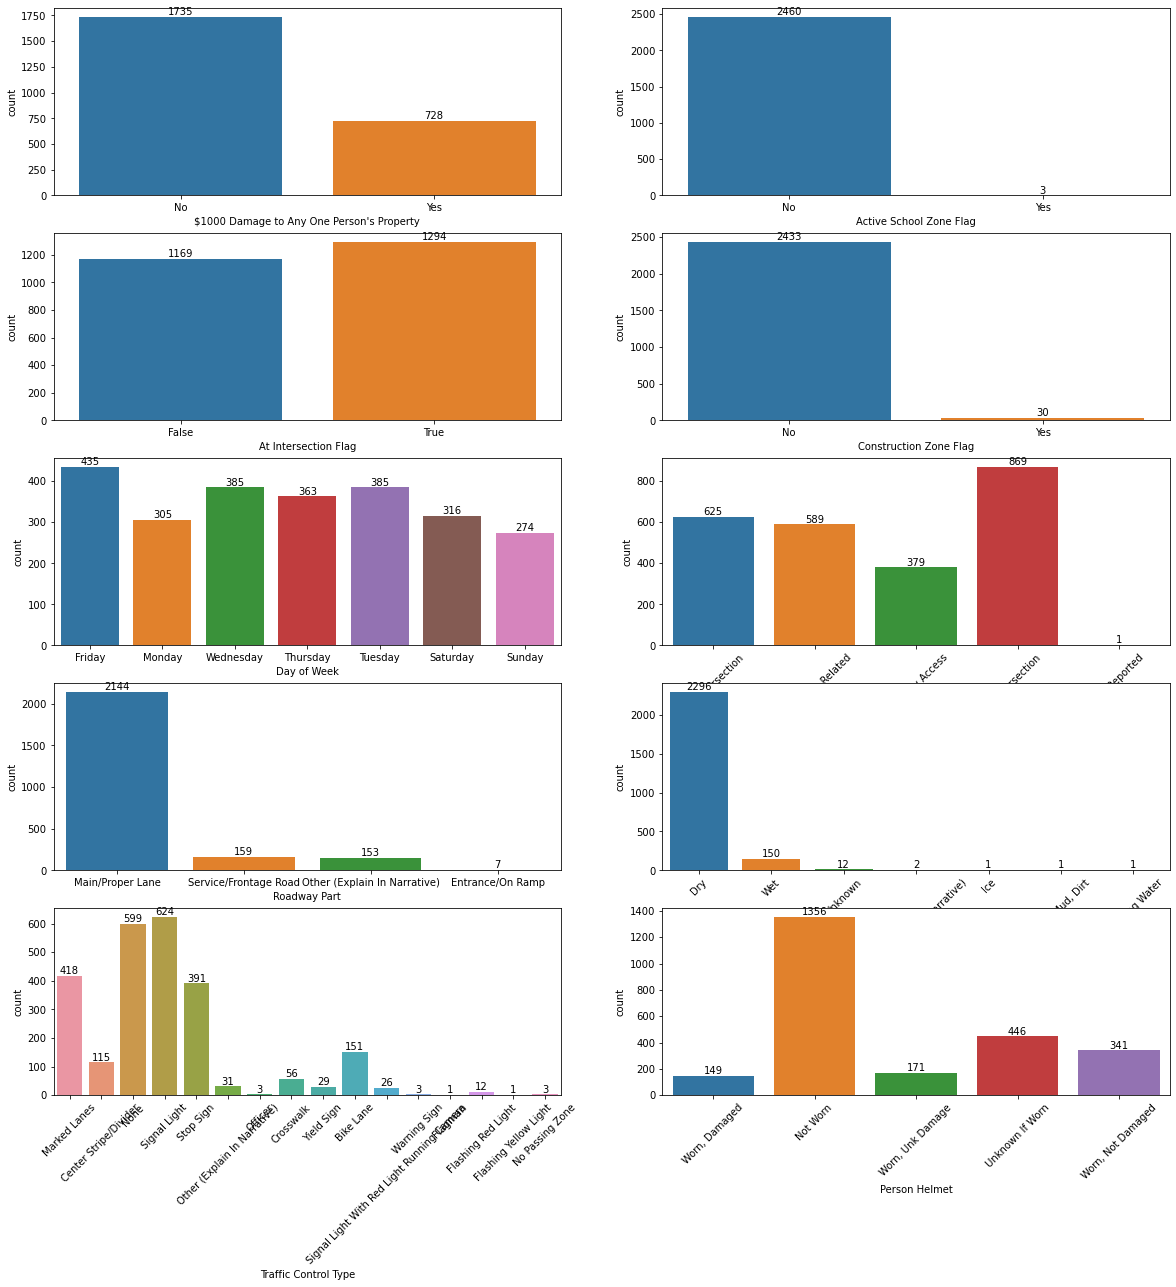

In [60]:
# dataset exploration based on categorical values
fig, ax = plt.subplots(5,2, figsize=(20,20))
a=sns.countplot(data=df, x='$1000 Damage to Any One Person\'s Property' , ax=ax[0,0])
for container in a.containers:
    a.bar_label(container)

a=sns.countplot(data=df, x='Active School Zone Flag' , ax=ax[0,1])
for container in a.containers:
    a.bar_label(container)

a=sns.countplot(data=df, x='At Intersection Flag' , ax=ax[1,0])
for container in a.containers:
    a.bar_label(container)

a=sns.countplot(data=df, x='Construction Zone Flag' , ax=ax[1,1])
for container in a.containers:
    a.bar_label(container)

a=sns.countplot(data=df, x='Day of Week' , ax=ax[2,0])
for container in a.containers:
    a.bar_label(container)

a=sns.countplot(data=df, x='Intersection Related' , ax=ax[2,1])
for container in a.containers:
    a.bar_label(container)
a.set_xticklabels(a.get_xticklabels(), rotation=45)

a=sns.countplot(data=df, x='Roadway Part' , ax=ax[3,0])
for container in a.containers:
    a.bar_label(container)

a=sns.countplot(data=df, x='Surface Condition' , ax=ax[3,1])
for container in a.containers:
    a.bar_label(container)
a.set_xticklabels(a.get_xticklabels(), rotation=45)

a=sns.countplot(data=df, x='Traffic Control Type' , ax=ax[4,0])
for container in a.containers:
    a.bar_label(container)
a.set_xticklabels(a.get_xticklabels(), rotation=45)

a=sns.countplot(data=df, x='Person Helmet' , ax=ax[4,1])
for container in a.containers:
    a.bar_label(container)
a.set_xticklabels(a.get_xticklabels(), rotation=45)

    


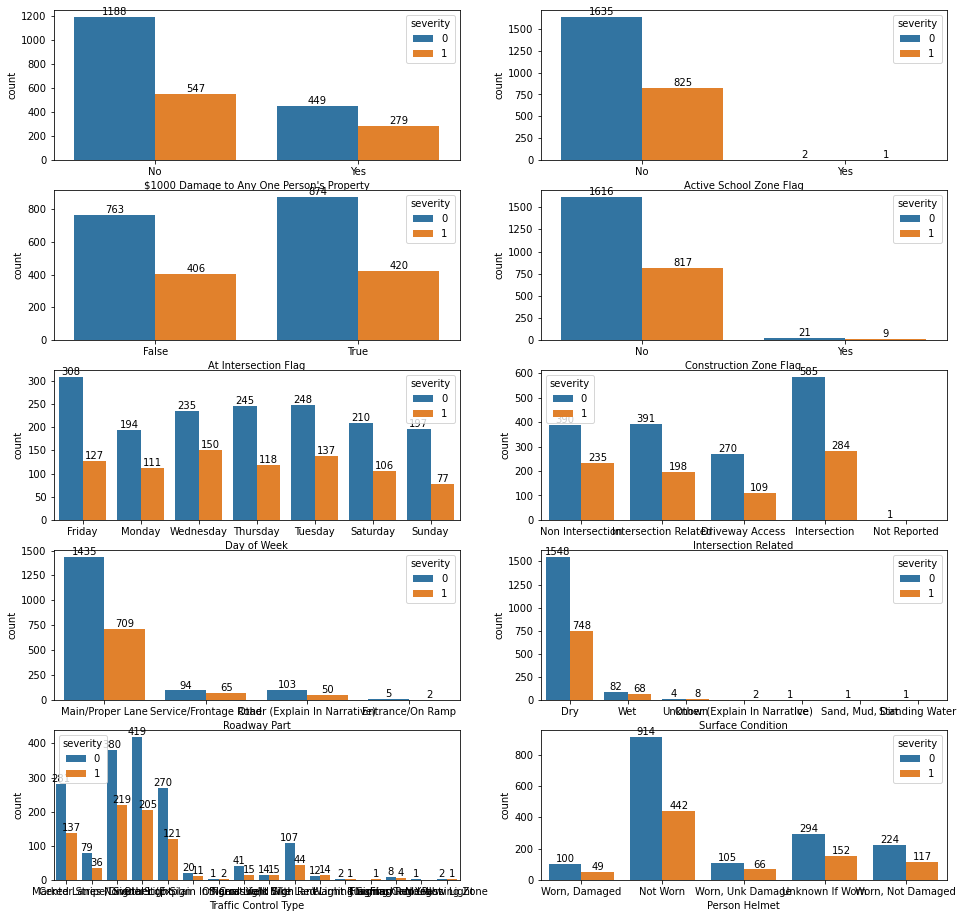

In [42]:
# dataset exploration based on categorical values
fig, ax = plt.subplots(5,2, figsize=(16,16))
a=sns.countplot(data=df, x='$1000 Damage to Any One Person\'s Property' , ax=ax[0,0], hue='severity')
for container in a.containers:
    a.bar_label(container)
a=sns.countplot(data=df, x='Active School Zone Flag' , ax=ax[0,1], hue='severity')
for container in a.containers:
    a.bar_label(container)
a=sns.countplot(data=df, x='At Intersection Flag' , ax=ax[1,0], hue='severity')
for container in a.containers:
    a.bar_label(container)
a=sns.countplot(data=df, x='Construction Zone Flag' , ax=ax[1,1], hue='severity')
for container in a.containers:
    a.bar_label(container)
a=sns.countplot(data=df, x='Day of Week' , ax=ax[2,0], hue='severity')
for container in a.containers:
    a.bar_label(container)
a=sns.countplot(data=df, x='Intersection Related' , ax=ax[2,1], hue='severity')
for container in a.containers:
    a.bar_label(container)
a=sns.countplot(data=df, x='Roadway Part' , ax=ax[3,0], hue='severity')
for container in a.containers:
    a.bar_label(container)
a=sns.countplot(data=df, x='Surface Condition' , ax=ax[3,1], hue='severity')
for container in a.containers:
    a.bar_label(container)
a=sns.countplot(data=df, x='Traffic Control Type' , ax=ax[4,0], hue='severity')
for container in a.containers:
    a.bar_label(container)
a=sns.countplot(data=df, x='Person Helmet' , ax=ax[4,1], hue='severity')
for container in a.containers:
    a.bar_label(container)

In [199]:
fig = px.histogram(df, x='Crash Year')
fig

## Outliers check

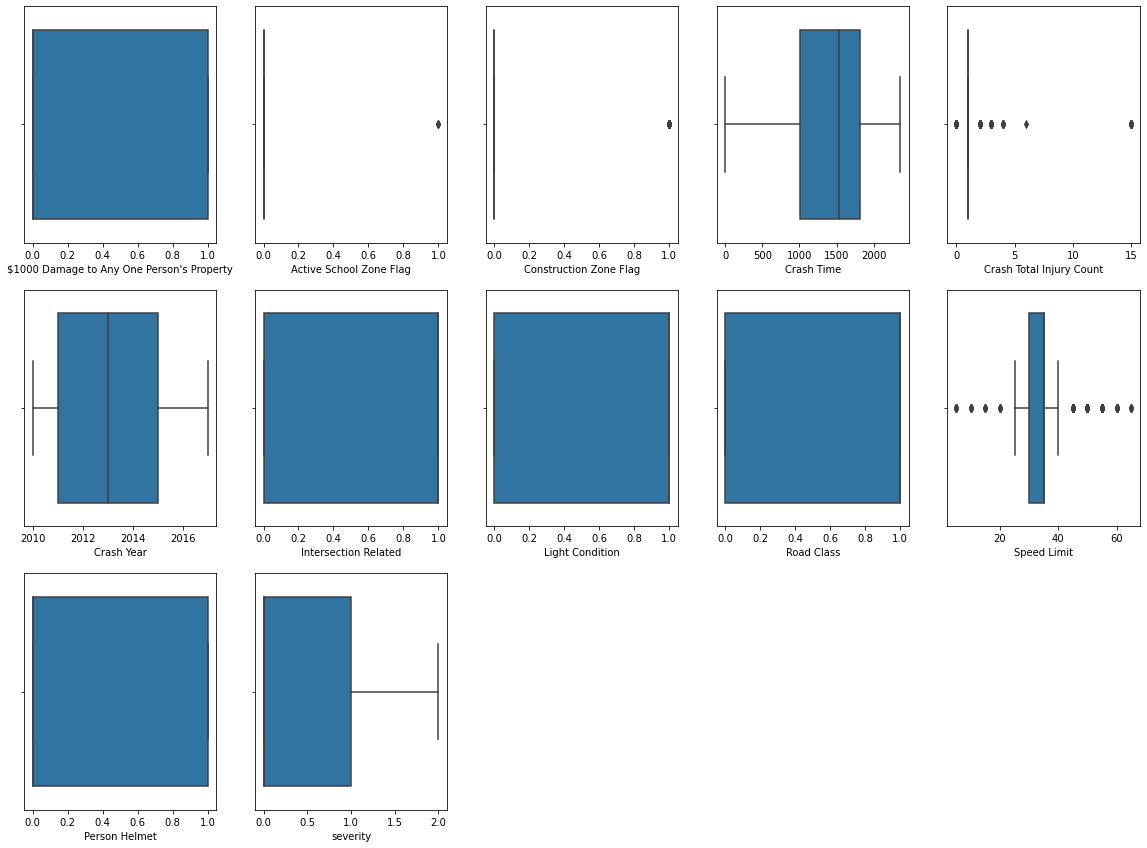

In [371]:

plt.figure(figsize =(20, 20 ))
x = 1 

for column in df.columns:
    plt.subplot(4,5,x)
    sns.boxplot(df[column])
    x+=1
plt.tight_layout
plt.show()

## Correlation Analysis

<AxesSubplot:>

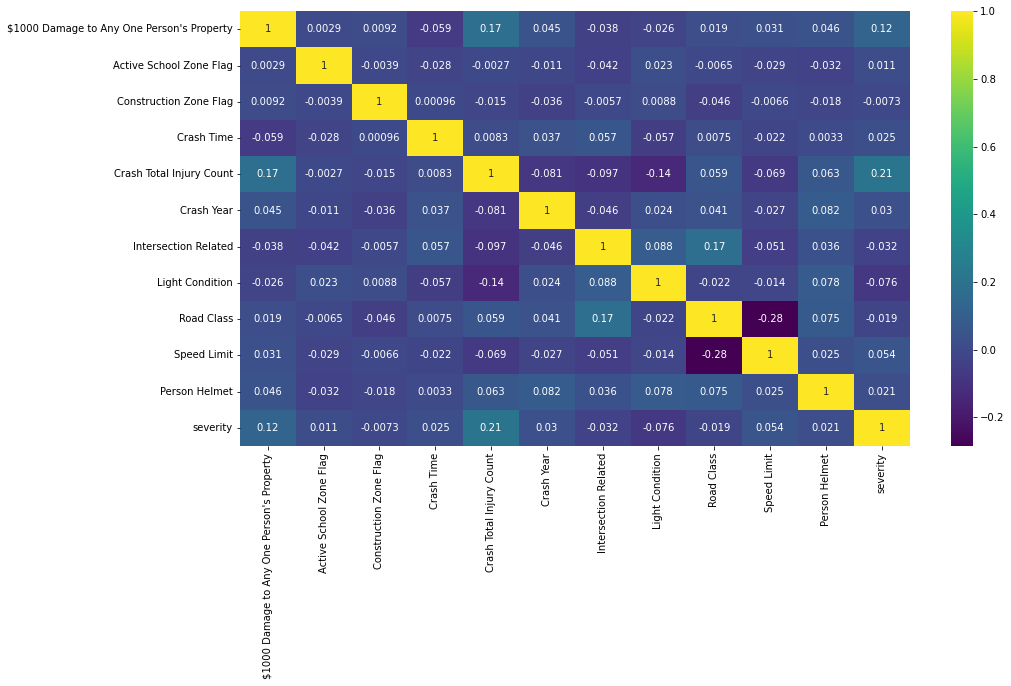

In [372]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True, cmap='viridis')

In [373]:
#Correlation with independent variable purchase
corr=df.corr()

corr['severity'].sort_values(ascending = False)[1:]
 


Crash Total Injury Count                     0.207228
$1000 Damage to Any One Person's Property    0.123864
Speed Limit                                  0.054016
Crash Year                                   0.029688
Crash Time                                   0.024582
Person Helmet                                0.020800
Active School Zone Flag                      0.011338
Construction Zone Flag                      -0.007316
Road Class                                  -0.018841
Intersection Related                        -0.032412
Light Condition                             -0.075797
Name: severity, dtype: float64

In [374]:
# Check for Multicollinearity 
def calc_vif(X):

    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [375]:
calc_vif(df)

,variables,VIF
0,$1000 Damage to Any One Person's Property,1.486657
1,Active School Zone Flag,1.006566
2,Construction Zone Flag,1.015546
3,Crash Time,7.413616
4,Crash Total Injury Count,2.017629
5,Crash Year,54.466959
6,Intersection Related,2.591759
7,Light Condition,3.436772
8,Road Class,4.491728
9,Speed Limit,32.912325


In [376]:
df= df.drop(['Crash Year'], axis=1)
calc_vif(df)

,variables,VIF
0,$1000 Damage to Any One Person's Property,1.483309
1,Active School Zone Flag,1.004731
2,Construction Zone Flag,1.013700
3,Crash Time,6.421893
4,Crash Total Injury Count,1.954615
5,Intersection Related,2.564897
6,Light Condition,3.205305
7,Road Class,3.658649
8,Speed Limit,9.475775
9,Person Helmet,1.857476


# Models

## Model Prep

#### Train-test split 

In [398]:
# 70/30 division of training and test dataset
X = df.drop(['severity'], axis = 1)
y = df['severity']
X_train, X_test, y_train, y_test = train_test_split(df.drop('severity',axis=1), 
                                                    df['severity'], test_size=0.30, 
                                                    random_state=100)

#### Feature scaling 

In [378]:
# Feature before mean normalization
unscaled_features = X_train
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train_array = sc.fit_transform(X_train.values)
# Assign the scaled data to a DataFrame and use the index and columns arguments to keep original indeces and column names:
X_train = pd.DataFrame(X_train_array, index= X_train.index, columns= X_train.columns)
X_test_array = sc.transform(X_test.values)
X_test = pd.DataFrame(X_test_array, index= X_test.index, columns= X_test.columns)

## 1) Logistic Regression

In [379]:
start_time = datetime.now()
log_model = sm.MNLogit(y_train, X_train).fit()
print(log_model.summary())
print('speed:', datetime.now() - start_time)

Optimization terminated successfully.
         Current function value: 1.055933
         Iterations 7
                          MNLogit Regression Results                          
Dep. Variable:               severity   No. Observations:                 1724
Model:                        MNLogit   Df Residuals:                     1704
Method:                           MLE   Df Model:                           18
Date:                Fri, 10 Feb 2023   Pseudo R-squ.:                 -0.2479
Time:                        15:44:04   Log-Likelihood:                -1820.4
converged:                       True   LL-Null:                       -1458.8
Covariance Type:            nonrobust   LLR p-value:                     1.000
                               severity=1       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
$1000 Damage to Any One Person's Property     

In [380]:
# define the multinomial logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs').fit(X_train,y_train)
y_pred=model.predict(X_test)

print("Confusion Matrix\n",confusion_matrix(y_test, model.predict(X_test)))

print("Classification Report\n",classification_report(y_test, model.predict(X_test)))

Confusion Matrix
 [[486   0   0]
 [171   0   0]
 [ 74   0   8]]
Classification Report
               precision    recall  f1-score   support

           0       0.66      1.00      0.80       486
           1       0.00      0.00      0.00       171
           2       1.00      0.10      0.18        82

    accuracy                           0.67       739
   macro avg       0.55      0.37      0.33       739
weighted avg       0.55      0.67      0.54       739



In [381]:
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('Precision: %.3f' % precision_score(y_test, y_pred, average='weighted'))
print('Recall: %.3f' % recall_score(y_test, y_pred, average='weighted'))
mse = mean_squared_error(y_test, y_pred)
print('F1 score: %.3f' % f1_score(y_test, y_pred,average='weighted' ))
print('MSE: %.3f' % mse)

Accuracy: 0.668
Precision: 0.548
Recall: 0.668
F1 score: 0.545
MSE: 0.632


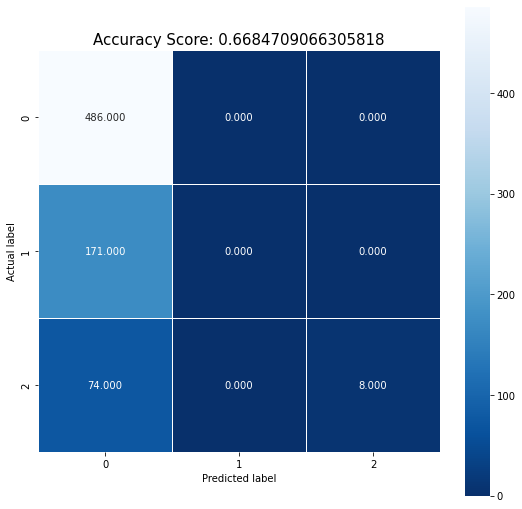

In [382]:
# Use score method to get accuracy of model
score = model.score(X_test, y_test)
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(y_test, model.predict(X_test)), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

## 2) Random Forest

In [439]:
# Fitting Random Forest Classification to the Training set
classifier = RandomForestClassifier(n_estimators = 5000, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)
rf_ypred=classifier.predict(X_test)
print('speed:', datetime.now() - start_time)


speed: 6:30:01.926781


In [440]:
print("Confusion Matrix\n",confusion_matrix(y_test, classifier.predict(X_test)))

print("Classification Report\n",classification_report(y_test, classifier.predict(X_test)))

Confusion Matrix
 [[385  73  28]
 [115  41  15]
 [ 52  13  17]]
Classification Report
               precision    recall  f1-score   support

           0       0.70      0.79      0.74       486
           1       0.32      0.24      0.28       171
           2       0.28      0.21      0.24        82

    accuracy                           0.60       739
   macro avg       0.43      0.41      0.42       739
weighted avg       0.56      0.60      0.58       739



Text(0.5, 0, 'Random Forest Feature Importance')

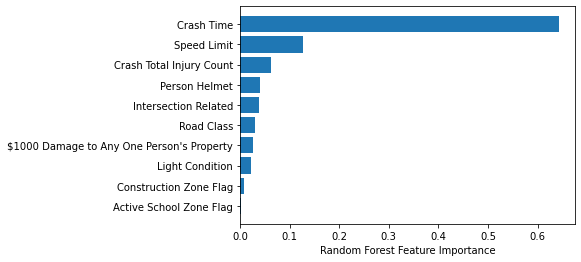

In [441]:
sorted_idx = classifier.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], classifier.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [442]:
print('Accuracy: %.3f' % accuracy_score(y_test, rf_ypred))
print('Precision: %.3f' % precision_score(y_test, rf_ypred, average='weighted'))
print('Recall: %.3f' % recall_score(y_test, rf_ypred, average='weighted'))
mse = mean_squared_error(y_test, rf_ypred)
print('F1 score: %.3f' % f1_score(y_test, rf_ypred,average='weighted' ))
print('MSE: %.3f' % mse)

Accuracy: 0.599
Precision: 0.565
Recall: 0.599
F1 score: 0.578
MSE: 0.725


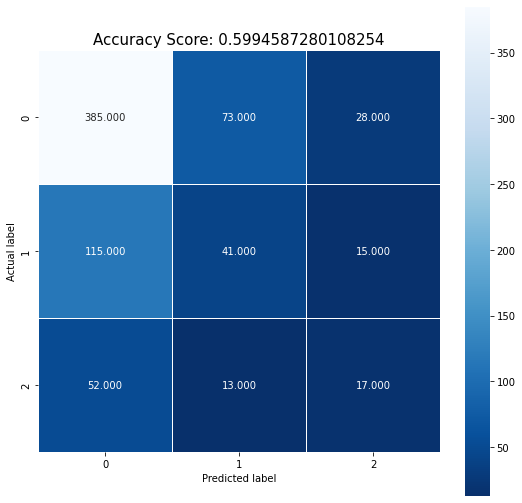

In [443]:
# Use score method to get accuracy of model
score = classifier.score(X_test, y_test)
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(y_test, classifier.predict(X_test)), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

## 3) Neural Network

In [412]:
# Fit neural network classifier
mlp = MLPClassifier(hidden_layer_sizes=(10,), 
                    max_iter=1000, 
                    random_state=42, 
                    solver = 'sgd', 
                    learning_rate_init = 0.01)
mlp.fit(X_train, y_train)
nn_ypred = mlp.predict(X_test)
print(mlp.score(X_test, y_test))
print('speed:', datetime.now() - start_time)


0.6576454668470907
speed: 0:18:00.658735


In [420]:
# Fit neural network classifier
mlp = MLPClassifier(hidden_layer_sizes=(10,), 
                    max_iter=10000, 
                    random_state=42, 
                    solver = 'sgd', 
                    learning_rate_init = 0.01)
mlp.fit(X_train, y_train)
nn_ypred = mlp.predict(X_test)
print(mlp.score(X_test, y_test))
print('speed:', datetime.now() - start_time)

0.6576454668470907
speed: 0:20:45.691943


In [418]:
# Fit neural network classifier
mlp = MLPClassifier(hidden_layer_sizes=(10,), 
                    max_iter=15000, 
                    random_state=42, 
                    solver = 'sgd', 
                    learning_rate_init = 0.05)
mlp.fit(X_train, y_train)
nn_ypred = mlp.predict(X_test)
print(mlp.score(X_test, y_test))
print('speed:', datetime.now() - start_time)

0.6549391069012178
speed: 0:20:30.392992


In [421]:
# Fit neural network classifier
mlp = MLPClassifier(hidden_layer_sizes=(10,), 
                    max_iter=10000, 
                    random_state=42, 
                    solver = 'sgd', 
                    learning_rate_init = 0.001)
mlp.fit(X_train, y_train)
nn_ypred = mlp.predict(X_test)
print(mlp.score(X_test, y_test))
print('speed:', datetime.now() - start_time)

0.6576454668470907
speed: 0:20:52.589343


In [425]:
print("Confusion Matrix\n",confusion_matrix(y_test, mlp.predict(X_test)))

print("Classification Report\n",classification_report(y_test, mlp.predict(X_test)))

Confusion Matrix
 [[486   0   0]
 [171   0   0]
 [ 82   0   0]]
Classification Report
               precision    recall  f1-score   support

           0       0.66      1.00      0.79       486
           1       0.00      0.00      0.00       171
           2       0.00      0.00      0.00        82

    accuracy                           0.66       739
   macro avg       0.22      0.33      0.26       739
weighted avg       0.43      0.66      0.52       739



In [423]:
print('Accuracy: %.3f' % accuracy_score(y_test, nn_ypred))
print('Precision: %.3f' % precision_score(y_test, nn_ypred, average='weighted'))
print('Recall: %.3f' % recall_score(y_test, nn_ypred, average='weighted'))
mse = mean_squared_error(y_test, nn_ypred)
print('F1 score: %.3f' % f1_score(y_test, nn_ypred,average='weighted' ))
print('MSE: %.3f' % mse)

Accuracy: 0.658
Precision: 0.432
Recall: 0.658
F1 score: 0.522
MSE: 0.675


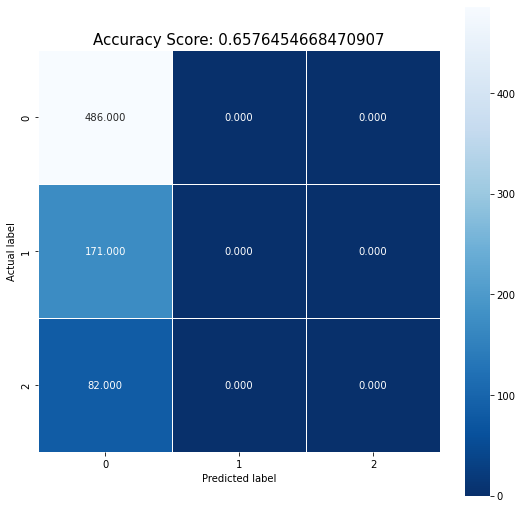

In [424]:
# Use score method to get accuracy of model
score = mlp.score(X_test, y_test)
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(y_test, mlp.predict(X_test)), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

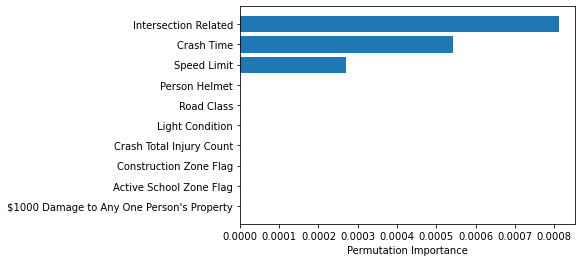

In [436]:
# Calculate permutation importance
# This method works by randomly permuting the values of a single feature and measuring the impact on the model's performance.
from sklearn.inspection import permutation_importance

result = permutation_importance(mlp, X_test, y_test, n_repeats=10, random_state=0)
sorted_idx = result.importances_mean.argsort()

# Plot feature importances
pos = np.arange(sorted_idx.shape[0]) + .5
plt.barh(X.columns[sorted_idx], result.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
plt.show()